In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

sns.set()

In [3]:
df=pd.read_excel("Data_Train.xlsx")

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [10]:
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month


In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [12]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [13]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"],axis=1,inplace=True)
# Now we can drop Dep_Time as it is of no use

In [14]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [15]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [16]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [17]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [18]:
# Adding duration_hours and duration_mins list to train_data dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [19]:
df.drop(["Duration"], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [20]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

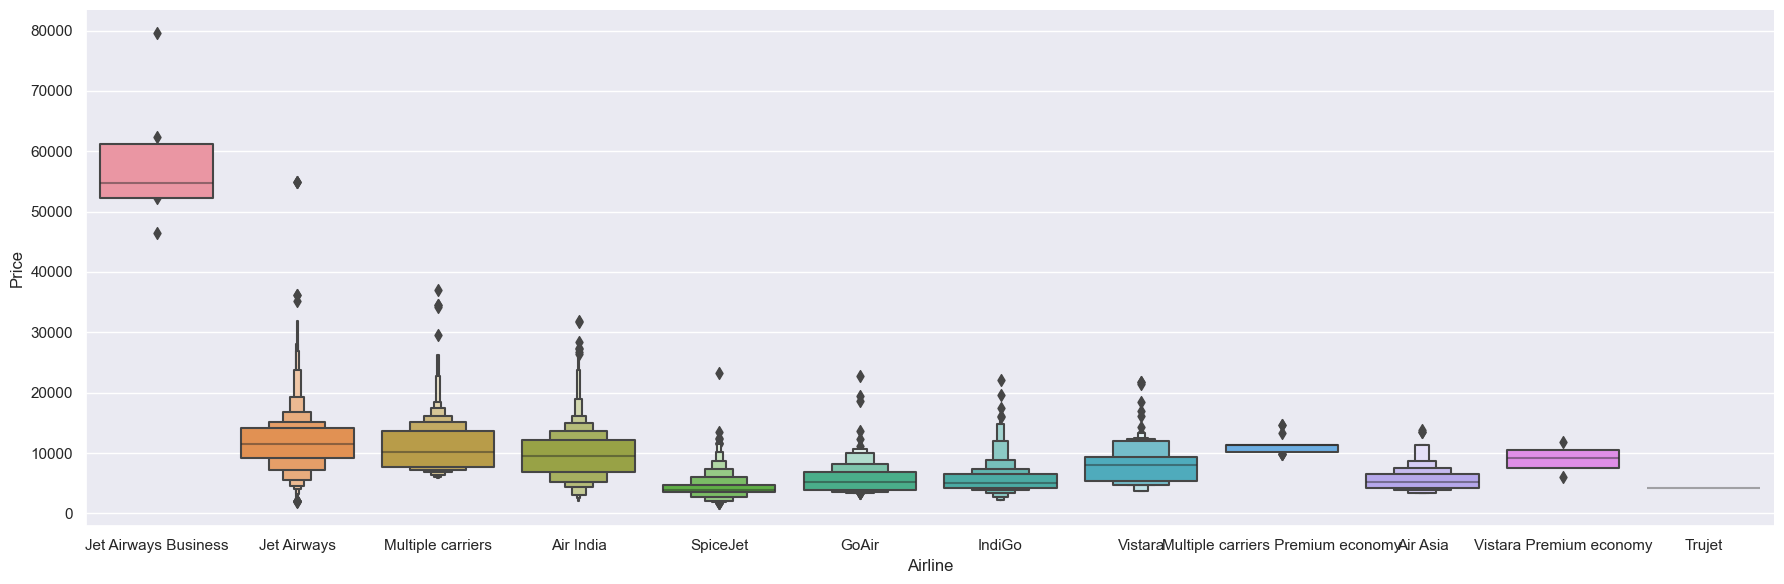

In [21]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()


In [22]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [23]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

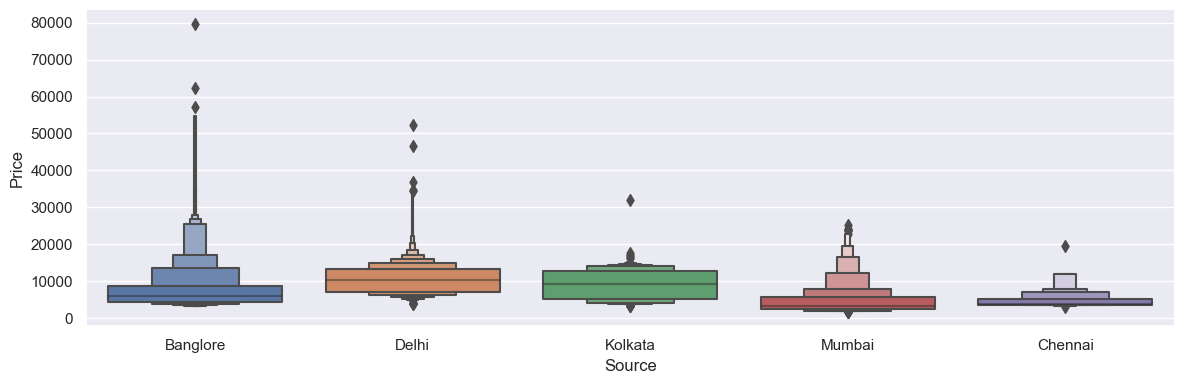

In [24]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [25]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [26]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [27]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [28]:
df["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [29]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [30]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [31]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [32]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [33]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
df= pd.concat([df, Airline, Source, Destination], axis = 1)

In [34]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [35]:
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [36]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [37]:
df.shape

(10682, 30)

In [38]:
df_test=pd.read_excel(r"flighttest.xlsx")

In [39]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [40]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(df_test.info())

print()
print()

print("Null values :")
print("-"*75)
df_test.dropna(inplace = True)
print(df_test.isnull().sum())


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          1687 non-null   object
 1   Date_of_Journey  1687 non-null   object
 2   Source           1687 non-null   object
 3   Destination      1687 non-null   object
 4   Route            1687 non-null   object
 5   Dep_Time         1687 non-null   object
 6   Arrival_Time     1687 non-null   object
 7   Duration         1687 non-null   object
 8   Total_Stops      1687 non-null   object
 9   Additional_Info  1687 non-null   object
dtypes: object(10)
memory usage: 131.9+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [41]:

# EDA

# Date_of_Journey
df_test["Journey_day"] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day
df_test["Journey_month"] = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)
# Dep_Time
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"] = duration_mins
df_test.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(df_test["Airline"].value_counts())
Airline = pd.get_dummies(df_test["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(df_test["Source"].value_counts())
Source = pd.get_dummies(df_test["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(df_test["Destination"].value_counts())
Destination = pd.get_dummies(df_test["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
df_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
df_test = pd.concat([df_test, Airline, Source, Destination], axis = 1)

df_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", df_test.shape)

Airline
---------------------------------------------------------------------------
Jet Airways                          560
IndiGo                               334
Air India                            274
Multiple carriers                    232
SpiceJet                             134
Vistara                               75
Air Asia                              47
GoAir                                 28
Vistara Premium economy                2
Multiple carriers Premium economy      1
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       725
Kolkata     459
Banglore    352
Mumbai      103
Chennai      48
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin       725
Banglore     459
Delhi        197
New Delhi    155
Hyderabad    103
Kolkata       48
Name: Destination, dtype: int64


Shape of test data :  (1687, 27)


In [42]:
df_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
df.shape

(10682, 30)

In [44]:
df.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [45]:
X = df.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
y = df.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

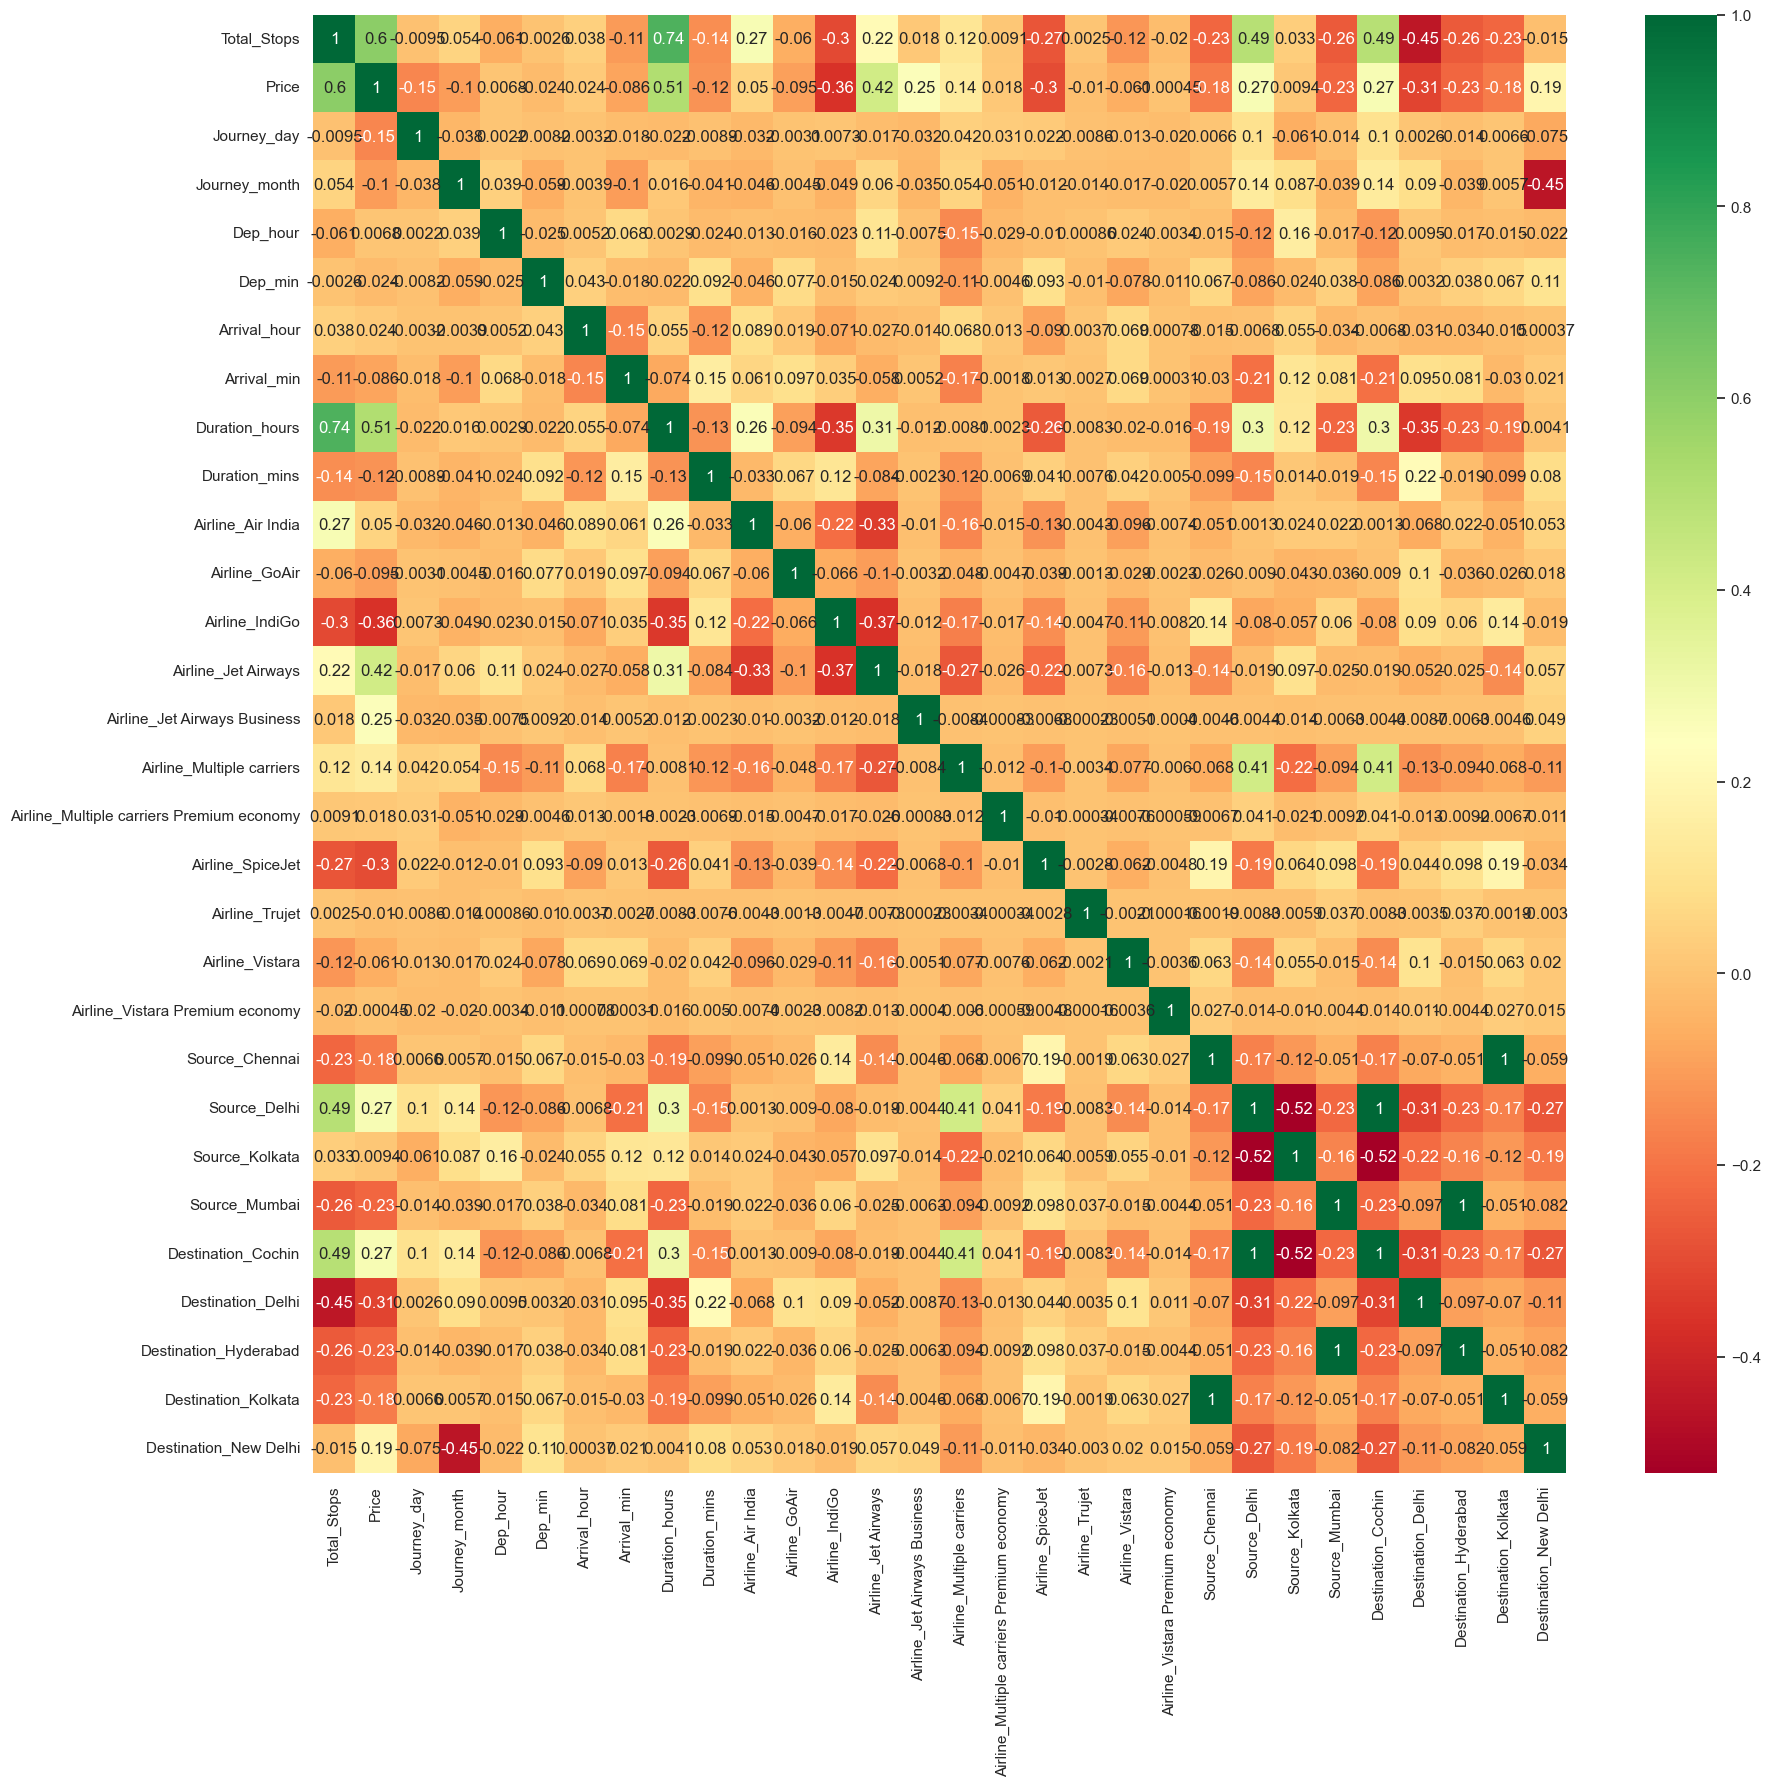

In [47]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [48]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [49]:
print(selection.feature_importances_)

[2.32906621e-01 1.43754369e-01 5.25298919e-02 2.46674924e-02
 2.09775640e-02 2.85596369e-02 1.93761020e-02 1.17008895e-01
 1.73471822e-02 7.78038743e-03 1.88649670e-03 2.08214663e-02
 1.41059210e-01 6.71543197e-02 1.70330470e-02 8.55739989e-04
 3.24154878e-03 1.08598822e-04 4.79119602e-03 7.96003138e-05
 4.44372954e-04 9.60441015e-03 3.33698284e-03 7.42271751e-03
 9.28277555e-03 1.61364931e-02 6.28919207e-03 4.78590453e-04
 2.50651004e-02]


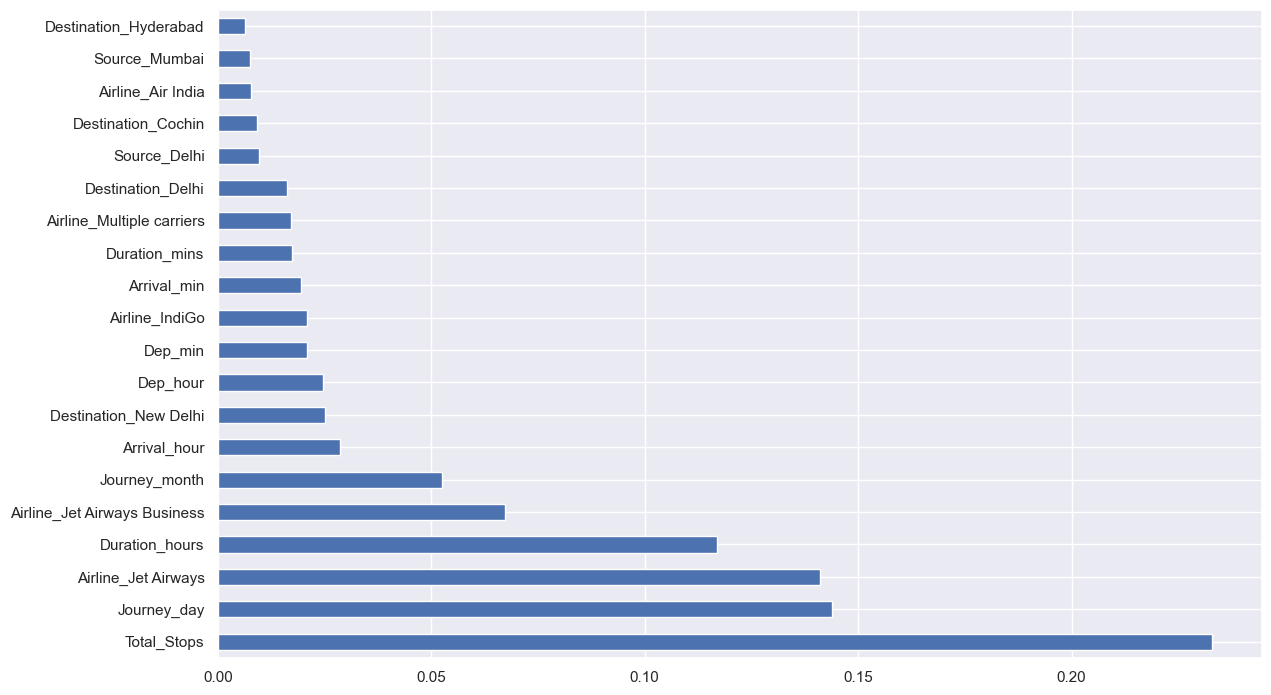

In [50]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [51]:
#model buliding 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [52]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
y_pred = reg_rf.predict(X_test)

In [54]:
reg_rf.score(X_train, y_train)

0.9536438649350362

In [55]:
reg_rf.score(X_test, y_test)

0.7954624458810678

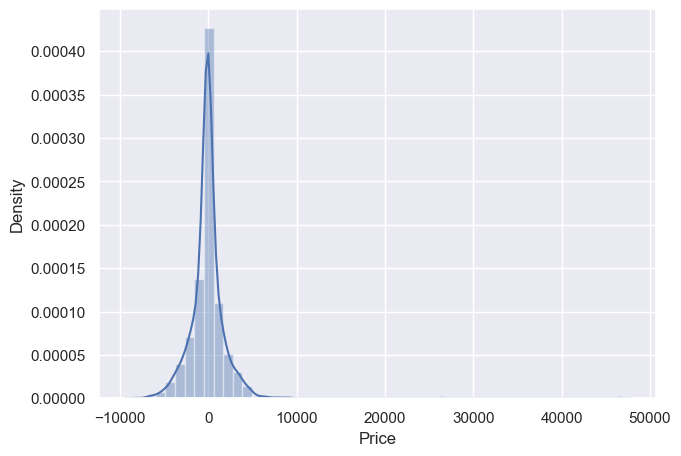

In [56]:
sns.distplot(y_test-y_pred)
plt.show()

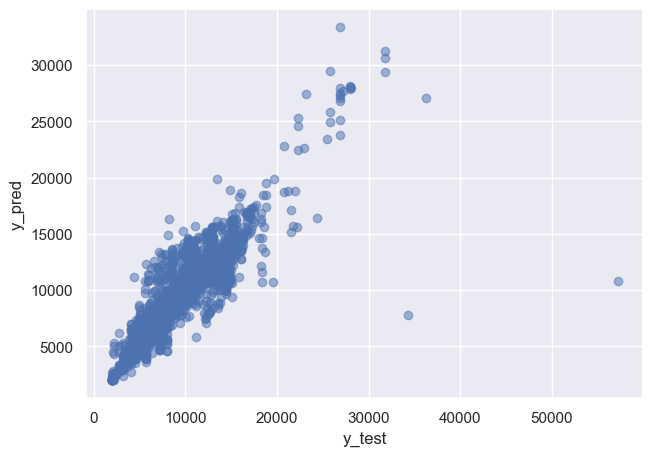

In [57]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [58]:
from sklearn import metrics

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1180.2793693769704
MSE: 4410250.262318703
RMSE: 2100.059585421019


In [60]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [61]:
metrics.r2_score(y_test, y_pred)

0.7954624458810678

In [62]:

#gyperparameter tuning 
from sklearn.model_selection import RandomizedSearchCV

In [63]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [64]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [65]:
from sklearn.ensemble import RandomForestRegressor

rf_random = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
 

In [66]:
rf_random.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [67]:
prediction = rf_random.predict(X_test)

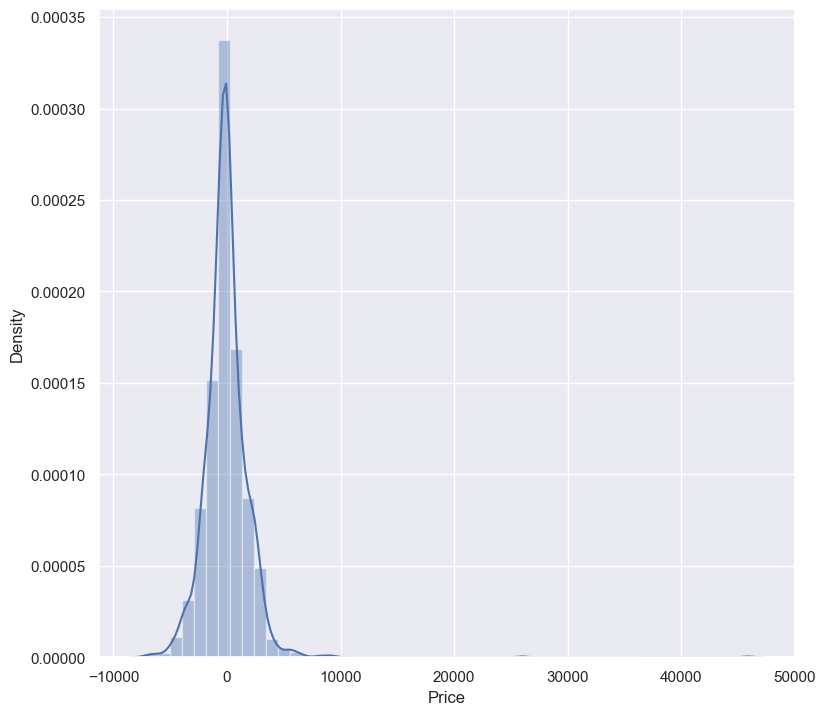

In [68]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

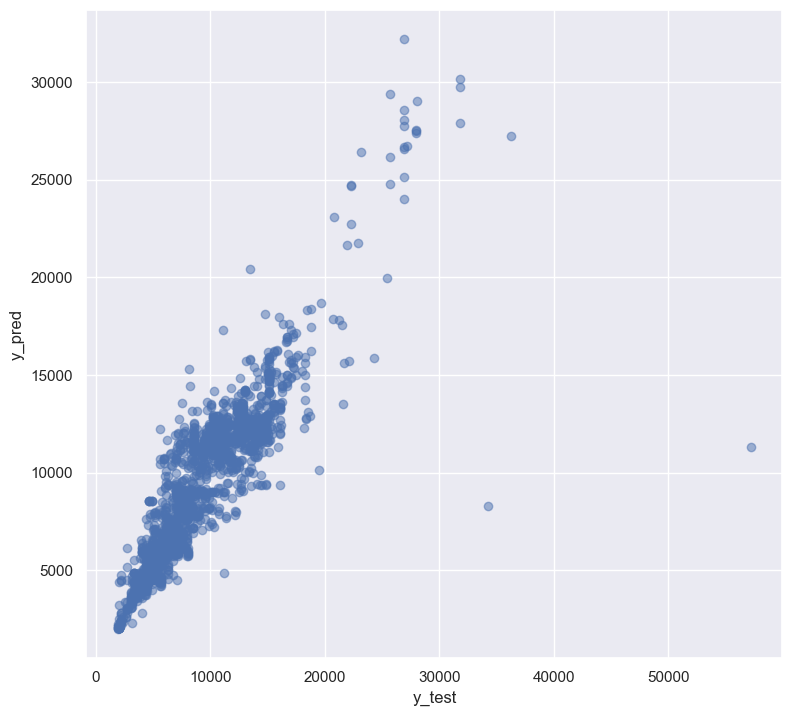

In [69]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1276.5215249014818
MSE: 4260909.0116368495
RMSE: 2064.196941097639


In [71]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')
# dump information to that file
pickle.dump(reg_rf, file)

In [72]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [214]:
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [73]:
y_prediction = forest.predict(X_test)

In [74]:
metrics.r2_score(y_test, y_prediction)

0.7954624458810678

In [57]:
df=df.fillna(0)

In [58]:
import numpy as np

# replace empty cells with NaN
df.replace('', np.nan, inplace=True)

# Replace non-finite values with 0
df = df.fillna(0)

# Cast columns to integer data type
df.Date = df.Date.astype('int64')
df.Month = df.Month.astype('int64')
df.Year = df.Year.astype('int64')
df.Dep_Time_Hour = df.Dep_Time_Hour.astype('int64')
df.Dep_Time_Mins = df.Dep_Time_Mins.astype('int64')
df.Arrival_date = df.Arrival_date.astype('int64')

# Replace non-finite values with 0
df = df.replace([np.inf, -np.inf], 0)

# Cast columns to integer data type
df.Arrival_Time_Hour = df.Arrival_Time_Hour.astype('int64')
df.Arrival_Time_Mins = df.Arrival_Time_Mins.astype('int64')
df.Travel_Mins = df.Travel_Mins.astype('int64')


In [59]:
df[df['Travel_Hours']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
6474,Air India,Mumbai,Hyderabad,2,No info,17327,6,3,2019,BOM,GOI,PNQ,16,50,1,0,0,5m,0


In [60]:
df.drop(index=6474,inplace=True,axis=0)

In [61]:
df.Travel_Hours=df.Travel_Hours.astype('int64')


In [62]:
category=['Airline','Source','Destination','Additional_Info','City1']
numerical=['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date',
          'Arrival_Time_Hour','Arrival_Time_Mins','Travel_hours','Travel_mins']

In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [64]:
df.Airline=le.fit_transform(df.Airline)
df.Source=le.fit_transform(df.Source)
df.Destination=le.fit_transform(df.Destination)
df.Total_Stops=le.fit_transform(df.Total_Stops)
df.City1=le.fit_transform(df.City1)
df.City2=le.fit_transform(df.City2)
df.City3=le.fit_transform(df.City3)
df.Additional_Info=le.fit_transform(df.Additional_Info)
df.head()


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,4,7,3897,24,3,2019,0,13,29,22,20,0,0,0,2,50
1,1,3,0,1,7,7662,1,5,2019,2,25,1,5,50,1,0,0,7,25
2,4,2,1,1,7,13882,9,6,2019,3,32,4,9,25,0,0,0,19,0
3,3,3,0,0,7,6218,12,5,2019,2,34,3,18,5,2,0,0,5,25
4,3,0,5,0,7,13302,1,3,2019,0,34,8,16,50,2,0,0,4,45


In [65]:
df.head()


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,4,7,3897,24,3,2019,0,13,29,22,20,0,0,0,2,50
1,1,3,0,1,7,7662,1,5,2019,2,25,1,5,50,1,0,0,7,25
2,4,2,1,1,7,13882,9,6,2019,3,32,4,9,25,0,0,0,19,0
3,3,3,0,0,7,6218,12,5,2019,2,34,3,18,5,2,0,0,5,25
4,3,0,5,0,7,13302,1,3,2019,0,34,8,16,50,2,0,0,4,45


In [66]:
#last run
df=df[['Airline','Source','Destination','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour','Arrival_Time_Mins','Price','Additional_Info']]

In [67]:
df.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Price,Additional_Info
0,3,0,5,24,3,2019,22,20,0,0,0,3897,7
1,1,3,0,1,5,2019,5,50,1,0,0,7662,7
2,4,2,1,9,6,2019,9,25,0,0,0,13882,7
3,3,3,0,12,5,2019,18,5,2,0,0,6218,7
4,3,0,5,1,3,2019,16,50,2,0,0,13302,7


In [68]:
df.describe()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Price,Additional_Info
count,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.0,10681.000000,10681.000000,10681.000000,10681.0,10681.0,10681.000000,10681.000000
mean,3.966483,1.952064,1.436008,13.509784,4.708735,2019.0,12.490684,24.406891,0.896920,0.0,0.0,9086.443123,6.582062
std,2.352025,1.177165,1.474836,8.479449,1.164345,0.0,5.748989,18.767046,0.711826,0.0,0.0,4611.075357,0.838132
min,0.000000,0.000000,0.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.0,0.0,1759.000000,0.000000
25%,3.000000,2.000000,0.000000,6.000000,3.000000,2019.0,8.000000,5.000000,0.000000,0.0,0.0,5277.000000,7.000000
50%,4.000000,2.000000,1.000000,12.000000,5.000000,2019.0,11.000000,25.000000,1.000000,0.0,0.0,8372.000000,7.000000
75%,4.000000,3.000000,2.000000,21.000000,6.000000,2019.0,18.000000,40.000000,1.000000,0.0,0.0,12373.000000,7.000000
max,11.000000,4.000000,5.000000,27.000000,6.000000,2019.0,23.000000,55.000000,2.000000,0.0,0.0,79512.000000,8.000000


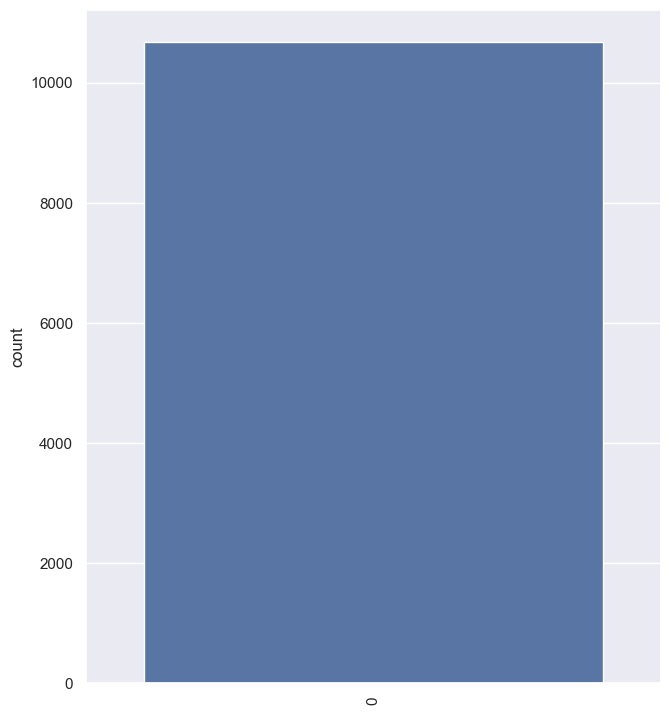

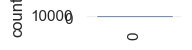

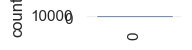

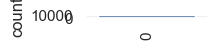

KeyError: 'City1'

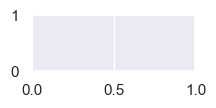

In [69]:
import seaborn as sns
c=1
plt.figure(figsize=(20,45))

for i in category:
    plt.subplot(6,3,c)
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
    
    plt.show()

<Axes: xlabel='Price', ylabel='Density'>

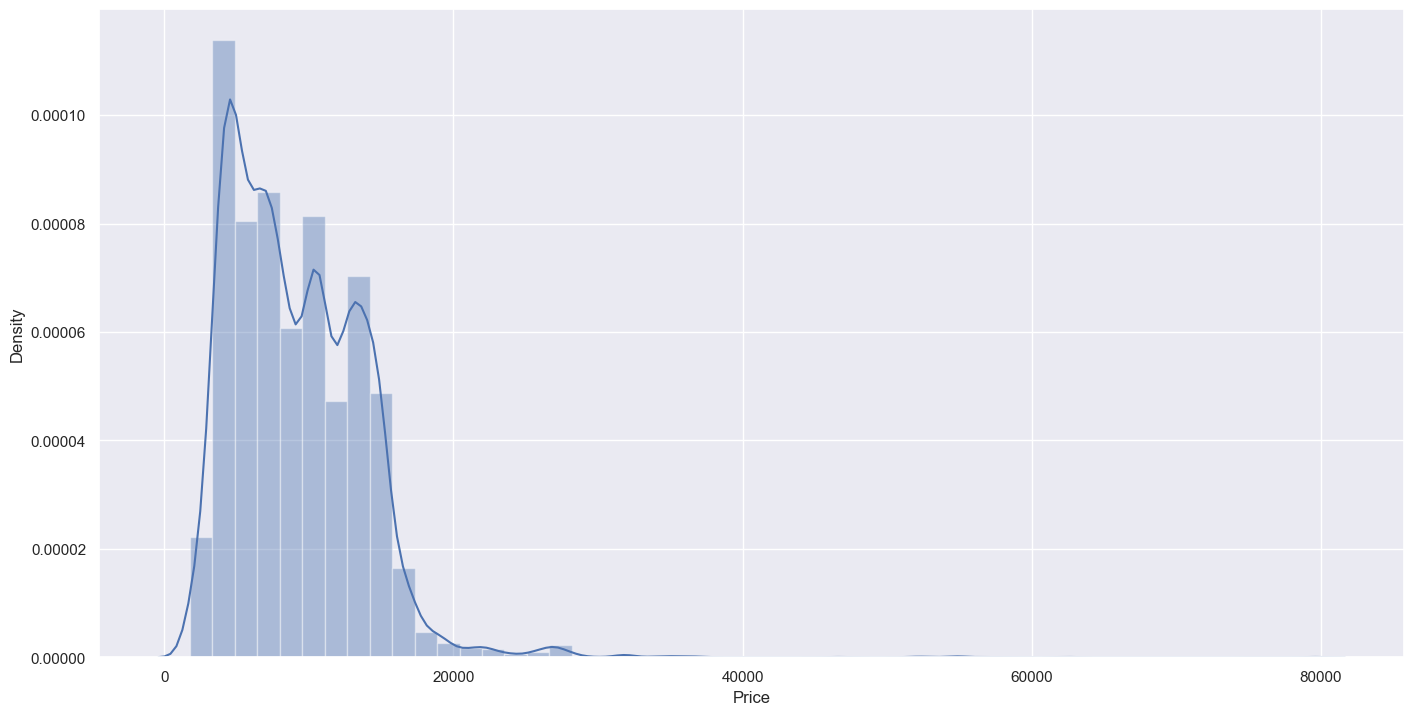

In [70]:
plt.figure(figsize=(15,8))
sns.distplot(df.Price)

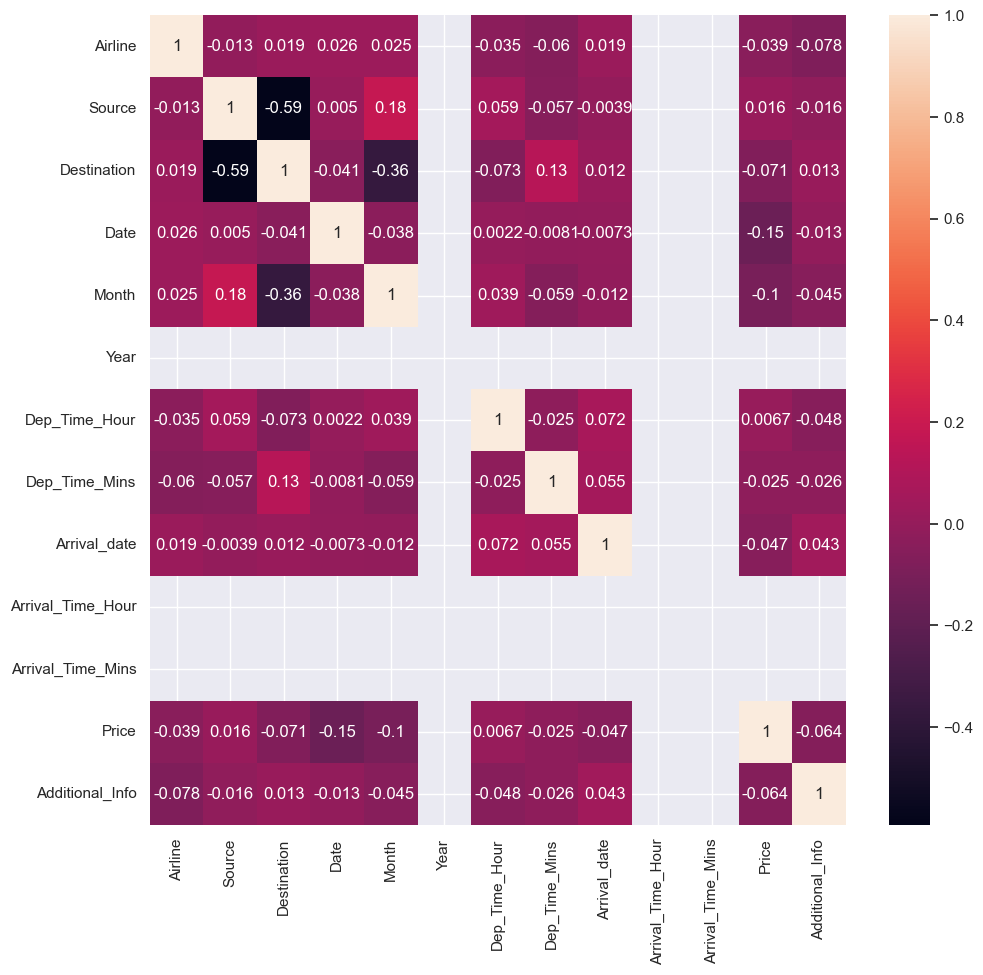

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Axes: >

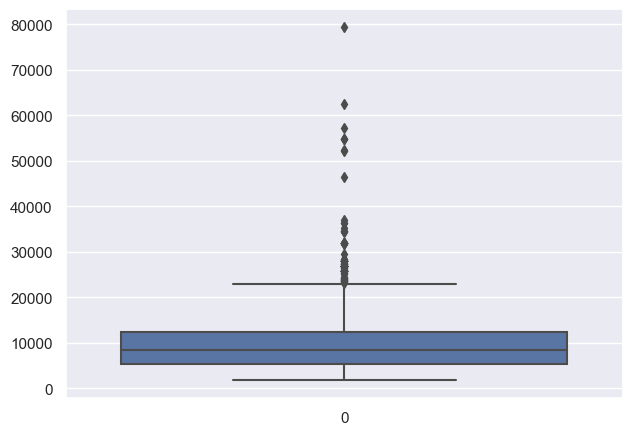

In [72]:
import seaborn as sns
sns.boxplot(df['Price'])

In [73]:
print(df.columns)

Index(['Airline', 'Source', 'Destination', 'Date', 'Month', 'Year',
       'Dep_Time_Hour', 'Dep_Time_Mins', 'Arrival_date', 'Arrival_Time_Hour',
       'Arrival_Time_Mins', 'Price', 'Additional_Info'],
      dtype='object')


In [74]:
y=df['Price']   
x=df.drop(columns=['Price','Additional_Info'],axis=1) 
# Remove the second column from x_train
#x= x.drop('Additional_date', axis=1)

In [51]:
###scaling the Data

In [75]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()

In [76]:
x_scaled=SS.fit_transform(x)

In [77]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()


,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins
0,-0.410934,-1.658354,2.416648,1.237192,-1.467619,0.0,1.654162,-0.234832,-1.260087,0.0,0.0
1,-1.261305,0.890262,-0.973718,-1.475375,0.250165,0.0,-1.303018,1.363790,0.144818,0.0,0.0
2,0.014251,0.040723,-0.295645,-0.531874,1.109057,0.0,-0.607211,0.031605,-1.260087,0.0,0.0
3,-0.410934,0.890262,-0.973718,-0.178060,0.250165,0.0,0.958355,-1.034142,1.549722,0.0,0.0
4,-0.410934,-1.658354,2.416648,-1.475375,-1.467619,0.0,0.610452,1.363790,1.549722,0.0,0.0


In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [79]:
x_train.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins
10611,4,4,3,18,5,2019,7,5,0,0,0
1034,8,2,1,24,4,2019,15,45,2,0,0
8123,4,2,1,27,6,2019,2,15,1,0,0
4779,4,3,0,1,4,2019,6,30,1,0,0
3207,3,3,0,24,5,2019,18,5,2,0,0


In [80]:
y_train = np.array(y_train).reshape(-1, 1) 
y_test = np.array(y_test).reshape(-1, 1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(8544, 11)
(8544, 1)
(2137, 11)
(2137, 1)


In [81]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()


In [83]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
for i in [rfr,gb,ad]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    test_score=r2_score(y_test,y_pred) # Use y_test instead of y_train
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.2:
        print(i)
    
    print("R2 score is",test_score) # Use test_score instead of r2_score(y_test, y_pred)
    print("R2 for train data",train_score)
    print("Mean Absolute Error is",mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error is",mean_squared_error(y_test, y_pred))
    print("Root Mean Absolute Error is",(mean_squared_error(y_test, y_pred, squared=False)))


RandomForestRegressor()
R2 score is 0.8008808511154398
R2 for train data 0.9190242551691286
Mean Absolute Error is 1279.1993301499149
Mean Squared Error is 4203755.879864101
Root Mean Absolute Error is 2050.306289280726
GradientBoostingRegressor()
R2 score is 0.7543904777503008
R2 for train data 0.7233202602774563
Mean Absolute Error is 1715.8595300536415
Mean Squared Error is 5185249.5307037
Root Mean Absolute Error is 2277.114298998559
AdaBoostRegressor()
R2 score is 0.34547995637676243
R2 for train data 0.3538271496868597
Mean Absolute Error is 2913.216400821412
Mean Squared Error is 13818070.72440456
Root Mean Absolute Error is 3717.2665662290833


In [84]:
#checking cross validation 
from sklearn.model_selection import cross_val_score
for i in range(2,5):
    cv=cross_val_score(rfr,x,y,cv=i)
    print(rfr,cv.mean())

RandomForestRegressor() 0.7697147678722958
RandomForestRegressor() 0.7649275703555142
RandomForestRegressor() 0.7788181651310162


In [85]:
#hypertuning model 
from sklearn.model_selection import RandomizedSearchCV

In [86]:
param_grid={'n_estimators':[10,30,50,70,100],'max_depth':[None,1,2,3],
            'max_features':['auto','sqrt']}
rfr=RandomForestRegressor()
rf_res=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,cv=3,verbose=2,n_jobs=1)
rf_res.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .max_depth=None, max_features=auto, n_estimators=10; total time=   0.9s
[CV] END .max_depth=None, max_features=auto, n_estimators=10; total time=   0.5s
[CV] END .max_depth=None, max_features=auto, n_estimators=10; total time=   0.5s
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=30; total time=   0.2s
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=30; total time=   0.1s
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=30; total time=   0.2s
[CV] END .max_depth=None, max_features=auto, n_estimators=70; total time=   3.6s
[CV] END .max_depth=None, max_features=auto, n_estimators=70; total time=   3.6s
[CV] END .max_depth=None, max_features=auto, n_estimators=70; total time=   3.6s
[CV] END ....max_depth=1, max_features=auto, n_estimators=30; total time=   0.2s
[CV] END ....max_depth=1, max_features=auto, n_estimators=30; total time=   0.1s
[CV] END ....max_depth=1, max_features=auto, n_e

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [87]:
gb=GradientBoostingRegressor()
gb_res=RandomizedSearchCV(estimator=gb,param_distributions=param_grid,cv=3,verbose=2,n_jobs=1)
gb_res.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.2s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, n_estimators=100; total time=   7.2s
[CV] END max_depth=None, max_features=auto, n_estimators=100; total time=   6.5s
[CV] END max_depth=None, max_features=auto, n_estimators=100; total time=   6.9s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.2s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.2s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.3s
[CV] END ...max_depth=2, max_features=auto, n_estimators=100; total time=   0.9s
[CV] END ...max_depth=2, max_features=auto, n_estimators=100; total time=   0.9s
[CV] END ...max_depth=2, max_features=auto, n_es

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [88]:
#accuracy 


rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train) 
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))


train accuracy 0.8921579496961398
test accuracy 0.7417831105274686


In [89]:
import pickle 
pickle.dump(rfr,open('book1.pkl','wb'))

In [90]:
print(df.columns)

Index(['Airline', 'Source', 'Destination', 'Date', 'Month', 'Year',
       'Dep_Time_Hour', 'Dep_Time_Mins', 'Arrival_date', 'Arrival_Time_Hour',
       'Arrival_Time_Mins', 'Price', 'Additional_Info'],
      dtype='object')
